In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
assert hasattr(tf,"function")

In [3]:
pomme_rayon     = 6
pomme_rayon_std = 0.5
pomme_masse     = 150
pomme_masse_std = 50

new_pomme = lambda : np.concatenate(
    (pomme_rayon_std*np.random.randn(1,1)+pomme_rayon,
    pomme_masse_std*np.random.randn(1,1)+pomme_masse)
    ,axis=1)

In [4]:
clementine_rayon     = 3
clementine_rayon_std = 0.125*2
clementine_masse     = 75
clementine_masse_std = 30

new_clementine = lambda : np.concatenate((
    clementine_rayon_std*np.random.randn(1,1)+ clementine_rayon,
    clementine_masse_std*np.random.randn(1,1)+ clementine_masse),
    axis=1)

In [5]:
N = 10**3

train_pomme = np.transpose(np.concatenate((
    pomme_rayon_std*np.random.randn(1,N)+pomme_rayon,
    pomme_masse_std*np.random.randn(1,N)+pomme_masse),axis=0))

train_clementine = np.transpose(np.concatenate((
    clementine_rayon_std*np.random.randn(1,N)+ clementine_rayon,
    clementine_masse_std*np.random.randn(1,N)+ clementine_masse),axis=0))

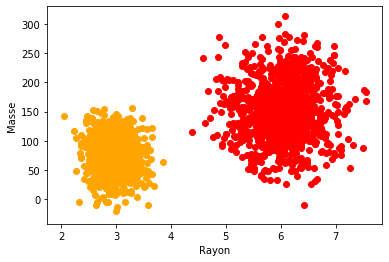

In [6]:
fig = plt.figure()
axes = fig.add_subplot(111)
axes.scatter(train_pomme[:,0],train_pomme[:,1],c='r')
axes.scatter(train_clementine[:,0],train_clementine[:,1],c='orange')
plt.xlabel("Rayon")
plt.ylabel("Masse")
plt.show()

In [7]:
model_exemple = lambda x : 300 - 300*(x-3.7)
x = np.arange(3.7,5,0.01)

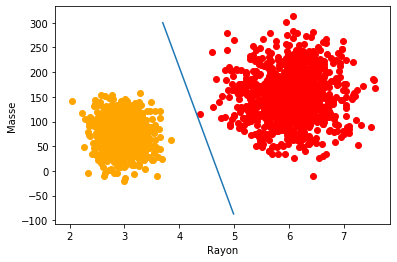

In [8]:
fig = plt.figure()
axes = fig.add_subplot(111)
axes.scatter(train_pomme[:,0],train_pomme[:,1],c='r')
axes.scatter(train_clementine[:,0],train_clementine[:,1],c='orange')
plt.xlabel("Rayon")
plt.ylabel("Masse")
axes.plot(x,model_exemple(x))

In [9]:
## Creation de la trainning set
## Pomme=1 ; Clementine = 0
train_feature_set  = np.concatenate( 
    (train_pomme,train_clementine),axis=0)

train_target_set = np.concatenate( 
    (
        np.transpose(np.ones(np.shape(train_pomme)[0])),
        np.transpose(np.zeros(np.shape(train_clementine)[0]))
    ),axis=0)

train_target_set = np.concatenate( 
(
    np.ones((N,1)),
    np.zeros((N,1)),
),axis=0)

In [10]:
print(train_feature_set)
print(train_target_set)

[[  6.0391171  112.23474672]
 [  6.38217096 107.79571454]
 [  5.97221774  72.41265587]
 ...
 [  3.17093036  70.58404532]
 [  2.72341664  98.51481916]
 [  3.0414209   81.98539956]]
[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]


In [11]:
def randomize(a, b):
    # Generate the permutation index array.
    permutation = np.random.permutation(a.shape[0])
    # Shuffle the arrays by giving the permutation in the square brackets.
    shuffled_a = a[permutation,:]
    shuffled_b = b[permutation]
    return shuffled_a, shuffled_b

In [12]:
train_feature_set, train_target_set = randomize( train_feature_set, train_target_set )

In [13]:
def segmoide(x):
    return 1/ (1 + np.exp(-x))

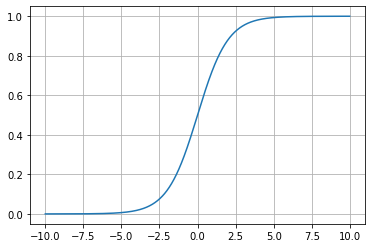

In [14]:
x = np.arange(-10,10,0.01)
plt.plot(x,segmoide(x))
plt.grid()

In [15]:
print( train_feature_set.shape)
print(train_target_set.shape)

(2000, 2)
(2000, 1)


In [16]:
##Creation model##

In [17]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [19]:
28*28

784

In [18]:
test_sample = new_clementine()

print(test_sample.shape)
print(test_sample)
print(model.predict(test_sample))

(1, 2)
[[ 2.35352163 60.30478674]]
[[0.]]


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [21]:
"""
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer='sgd',
    metrics=['accuracy']
)
"""
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=5, momentum=0.0, nesterov=False),
    metrics=['accuracy']
)

In [22]:
print(train_feature_set.shape)

train_target_set.shape

(2000, 2)


(2000, 1)

In [29]:
model.fit(train_feature_set, train_target_set, epochs=100)



Train on 2000 samples
Epoch 1/100
2000/2000 [==============================] - 0s 199us/sample - loss: 5129.0918 - accuracy: 0.6210
Epoch 2/100
2000/2000 [==============================] - 0s 237us/sample - loss: 5536.9958 - accuracy: 0.5855
Epoch 3/100
2000/2000 [==============================] - 0s 183us/sample - loss: 4015.1443 - accuracy: 0.6915
Epoch 4/100
2000/2000 [==============================] - 0s 184us/sample - loss: 5458.5471 - accuracy: 0.5940
Epoch 5/100
2000/2000 [==============================] - 0s 166us/sample - loss: 5586.8224 - accuracy: 0.5750
Epoch 6/100
2000/2000 [==============================] - 0s 233us/sample - loss: 5412.8012 - accuracy: 0.5965
Epoch 7/100
2000/2000 [==============================] - 0s 175us/sample - loss: 216.0389 - accuracy: 0.9855
Epoch 8/100
2000/2000 [==============================] - 0s 174us/sample - loss: 5198.3675 - accuracy: 0.6020
Epoch 9/100
2000/2000 [==============================] - 0s 188us/sample - loss: 6733.3555 - accura

In [31]:
model.get_weights()

[array([[857.0114 ],
        [ 13.77887]], dtype=float32),
 array([-5242.987], dtype=float32)]

In [32]:
nb = 100

x = np.linspace(2, 7, nb)
y = np.linspace(-100, 300, nb)
res = np.zeros((nb,nb))

In [33]:
tmp = np.zeros( [nb,2])
for xx in range(nb):
    for yy in range(nb):
        tmp[yy,0] = x[xx] 
        tmp[yy,1] = y[yy]
    [res[:,xx]] = model.predict(tmp).T

In [34]:
print(res.shape)

(100, 100)


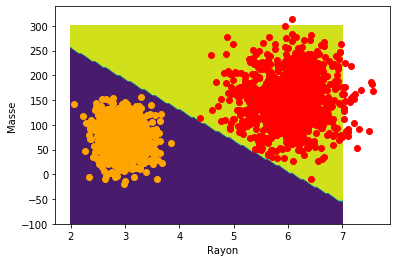

In [35]:
h = plt.contourf(x,y,res)
plt.scatter(train_pomme[:,0],train_pomme[:,1],c='r')
plt.scatter(train_clementine[:,0],train_clementine[:,1],c='orange')
plt.xlabel("Rayon")
plt.ylabel("Masse")
plt.show()